# Multi-Layer Perceptron: Classification of handwritten digits (MNIST)

## Imports

In [1]:
# importing functions and classes from our framework
from dataset import Dataset
from nn import MLP
from layers import Dense
# other imports
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

## Demo

<p style="text-align:justify;">
In the following, we will demonstrate how our Multi-Layer Perceptron can be used to classify handwritten digits.
For that purpose, we are loading a pretrained model whose architecture can be seen below. Note that unlike the previous layers, the output of the neural network uses Softmax as an activation function. This combined with the Crossentropy loss function is a good setup for classification tasks. Softmax returns a probability distribution over the available classes and Crossentropy yields a faster convergence for probability distributions than the Mean-Squared Error.
<p>

In [2]:
classifier = MLP()
classifier.load("mnist_classifier") # classifier is saved in '/models/mnist_classifier'
print(classifier)

-------------------- MULTI LAYER PERCEPTRON (MLP) --------------------

HIDDEN LAYERS = 1 
TOTAL PARAMETERS = 84060 

 *** 1. Layer: *** 
------------------------
DENSE 784 -> 100 [ReLU]
------------------------
Total parameters: 78500 
---> WEIGHTS: (100, 784)
---> BIASES: (100,)
------------------------

 *** 2. Layer: *** 
-----------------------
DENSE 100 -> 50 [ReLU]
-----------------------
Total parameters: 5050 
---> WEIGHTS: (50, 100)
---> BIASES: (50,)
-----------------------

 *** 3. Layer: *** 
-------------------------
DENSE 50 -> 10 [Softmax]
-------------------------
Total parameters: 510 
---> WEIGHTS: (10, 50)
---> BIASES: (10,)
-------------------------

----------------------------------------------------------------------



We now load a mini-batch of size 1 from the shuffled MNIST dataset and take the input image from the test set.

In [3]:
dataset = Dataset(name = "mnist", train_size = 60000, test_size = 10000, batch_size = 1)
randomBatch = next(dataset.batches())
inputImage  = randomBatch[1][0]
inputLabel  = randomBatch[1][1]

The first image from the test set is shown below.

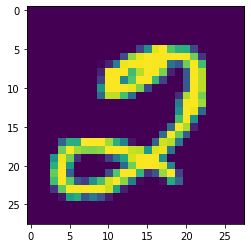

In [4]:
plt.imshow(inputImage.reshape(28,28))
plt.show()

In [5]:
# helper function
def prettyPerc(val, length = 5):
    out = str(round(val*100,2))
    return (length - len(out)) * " " + out

Now we feed the sample image through the neural network and show the predicted probability distribution over the classes.

In [6]:
prediction = classifier.predict(inputImage)
print("Probability distribution of classification:\n")
for i in range(10):
    print(f"{i}: {prettyPerc(prediction[i][0])} %")

Probability distribution of classification:

0:   0.0 %
1:   0.0 %
2: 99.46 %
3:  0.45 %
4:   0.0 %
5:  0.02 %
6:   0.0 %
7:   0.0 %
8:  0.07 %
9:   0.0 %


As you can see, the first handwritten has been predicted very accurately.

In [7]:
print(f"Predicted digit: {np.argmax(prediction)}")
print(f"Label:           {np.argmax(inputLabel)}")

Predicted digit: 2
Label:           2


Obviously our network still misclassifies some images. Thus we will loop over the test set, until we find an image, where the classification doesn't match the label of the image.

In [8]:
while np.argmax(prediction) == np.argmax(inputLabel):
    randomBatch = next(dataset.batches())
    inputImage  = randomBatch[1][0]
    inputLabel  = randomBatch[1][1]
    prediction = classifier.predict(inputImage)

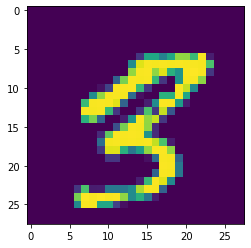

In [9]:
plt.imshow(inputImage.reshape(28,28))
plt.show()

<p style="text-align:justify;">
We are feeding an image of a 3 into the neural network, but the AI classifies it as a 8. The handwriting is a little bit sloppy. Thus the network misclassifies the digit.
</p>

In [10]:
prediction = classifier.predict(inputImage)
print("Probability distribution of classification:\n")
for i in range(10):
    print(f"{i}: {prettyPerc(prediction[i][0])} %")

Probability distribution of classification:

0:   0.0 %
1:   0.0 %
2:   0.0 %
3:  4.99 %
4:   0.0 %
5:  0.33 %
6:   0.0 %
7:   0.0 %
8: 90.48 %
9:  4.21 %


In [11]:
print(f"Predicted digit: {np.argmax(prediction)}")
print(f"Label:           {np.argmax(inputLabel)}")

Predicted digit: 8
Label:           3


### Compute accuracy

In [12]:
testDataset = Dataset(name = "mnist", train_size = 60000, test_size = 10000, batch_size = 10000)
sample = next(testDataset.batches())

In [13]:
# forward propagate the test data
_ = classifier.feedforward(sample[1][0])

In [15]:
print(f"Accuracy on test set: {round(classifier.getAccuracy(sample[1][1]),2)} %")

Accuracy on test set: 97.79 %


 Note that our approach is very simple, but we still get an about human level performance in terns of prediction accuracy.